**Introducción, preguntas y objetivo de predicción**

La conflictividad laboral es un fenómeno social complejo, resultado de acciones contenciosas colectivas que buscan alcanzar la satisfacción de demandas laborales. En el sector de mensajería urbana y delivery de alimentos, la conflictividad emerge hacia fines del siglo XX, cuando en 1999 a travez de una serie de movilizaciones espontáneas se reclama justicia por motoqueros fallecidos en accidentes de tránsito. Las relaciones laborales en este periodo se caracterizan por el empleo informal y precario. Contratados por pequeñas agencias de mensajería urbana y casas de comida, los derechos laborales no eran reconocidos, encontrándose privados del acceso a una obra social, seguro ante riesgos del trabajo y licencias por enfermedad o accidentes. La situación de precariedad propia de la informalidad laboral se agrava por la remuneración a destajo que incentiva a conducir a mayor velocidad con el fin de incrementar los ingresos percibidos y genera las condiciones que posibilitan una mayor tasa de siniestralidad. A partir de las primeras movilizaciones espontáneas se formó el núcleo de activistas que fundó el Sindicato Independiente de Mensajeros y Cadetes (SIMeCa) que impulsó movilizaciones por derechos básicos como la circulación en el microcentro, la reducción del precio de los peajes y, de modo central, el reconocimiento laboral del sector y el salario por tiempo. El discurso del SiMeCa vinculaba la mortandad a la falta de un contrato de trabajo y proponía el establecimiento de un salario por tiempo, sosteniendo que al desvincular la remuneración al tiempo de entrega se reduciría la siniestralidad en el sector.

Una década después, la Asociación Sindical de Mensajeros y Motoqueros (ASIMM), apoyada por la CGT y sectores peronistas, obtuvo el reconocimiento de la personería gremial y firmó el primer convenio colectivo de la actividad, extendiendo la cobertura sindical a más de tres mil trabajadores. Este proceso de regulación alcanzó un punto singular en año 2017 con la entrada de la plataforma Pedidos Ya, que registró a sus repartidores bajo el convenio de ASIMM –con una jornada de trabajo fija y un salario mensual–, un hecho excepcional en el capitalismo de plataformas. Sin embargo, en 2019 la empresa despidió a 430 trabajadores y adoptó un régimen de “contratistas independientes” al igual que sus competidoras Rappi, Glovo y UberEats. De este modo, el ciclo de expansión del trabajo protegido dio lugar a un nuevo escenario de precarización laboral. En este contexto, surgen los siguientes interrogantes: ¿El retorno a la precariedad laboral implica el inicio a un nuevo ciclo de protestas?, ¿las demandas de los trabajadores, las acciones contenciosas que llevan a cabo y el tipo de organización que construyen colectivamente son similares que las del periodo previo o se modifican? Finalmente, el objetivo de este proyecto es evaluar si los patrones empíricos de conflictividad laboral permiten discriminar entre conflictos asociados al trabajo en plataformas y aquellos correspondientes a otros regímenes laborales. Por patrones de conflictividad entiendo la relación existente entre demanda, organización y tipo de acción colectiva.


Utilizaré para el trabajo la base de datos de conflictividad laboral (2006-2023) confeccionada por la actual Secretaría de Trabajo de la Nación.
Primero realizó un análisis exploratorio de la base de datos, observando sus dimensiones (filas y columnas), tipos de datos y datos nulos. En esta etapa, realizo una inspección manual de datos que no corresponden a nuestro universo de estudio (como conflicto de camioneros de OCA o Correos Argentinos).

Segundo, utilizo métodos de feature selection para reducir las dimensiones de la base de datos: elimino columnas con datos nulos mayores al 50%, columnas con baja variabilidad (más de 90% de casos equivalentes) y con datos tipo objeto (textos largos). Adicionalmente, realizo una inspección cualitativa de las columnas y elimino aquellas que son redundantes (identificadores, datos que desagregan fecha o lugar, o que repiten información redundante para el análisis). Finalmente, vuelvo a revisar si existen datos nulos y confirmo su inexistencia.

Tercero, selecciono un método de aprendizaje supervisado que prediga a partir de la etiqueta “plataforma” (no o sí –0 y 1–) sí se trata de un conflicto de trabajadores de plataformas o no. En este caso, utilizo el método del árbol de decisiones para clasificar los datos, buscando encontrar patrones distintivos en el agrupamiento.

Cuarto, llevo adelante dos métodos de testeo y entrenamiento de datos. En primer lugar, utilizo el método train test split, con resultados moderados por tratarse de una cuota de datos en una base pequeña. En segundo lugar, decido seleccionar un método más específico para validar dataset pequeños que trabaje con mayor número de datos y realizo una nueva evaluación y testeo con el método k-fold cross-validation que utiliza todo el universo de datos. Con este método obtengo una mayor tasa de aciertos y una baja desviación.

Quinto, realizamos una serie de conclusiones.

En esta nueva versión elimino del proyecto el análisis de cluster y descriptivo de datos que realizamos en la entrega anterior, dejándola en un documento accesorio.


In [8]:
# Comienzo importando las librerias que utilizó para el analisis de datos y cargo la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comenzamos cargando la base de datos
df_base_conflicto = pd.read_excel("/content/BASE 2006-2023_conplataformas (1).xlsx")

In [9]:
##\ realizamos un analisis exploratorio del data set con los comandos "shape", "info" y "describe"

df_base_conflicto.shape, df_base_conflicto.info(), df_base_conflicto.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Columns: 120 entries, Conf_N to A_Obser
dtypes: float64(23), int64(81), object(16)
memory usage: 145.4+ KB


((155, 120),
 None,
              Conf_N    CONTROL  Observaciones     Muletos        CAnt_N  \
 count    155.000000  21.000000            1.0  155.000000    155.000000   
 mean   40886.019355   0.714286            2.0    0.116129   6809.748387   
 std    13521.505956   1.189237            NaN    0.394027  15923.687488   
 min      694.000000   0.000000            2.0    0.000000      0.000000   
 25%    38939.500000   0.000000            2.0    0.000000      0.000000   
 50%    46108.000000   0.000000            2.0    0.000000      0.000000   
 75%    48904.500000   2.000000            2.0    0.000000      0.000000   
 max    55001.000000   3.000000            2.0    2.000000  51693.000000   
 
            CAnt_C  CAnt_Acu         Mes        Trim         Sem  ...  \
 count  155.000000     155.0  155.000000  155.000000  155.000000  ...   
 mean     0.612903       0.0    6.722581    2.561290    1.529032  ...   
 std      2.228467       0.0    3.252443    1.069554    0.500774  ...   
 m

"shape": informa las dimensiones del dataset: 120 columnas y 155 filas
"Info": describe la clase de objeto (dataframe de pandas); el rango del indice (155 filas), el número de columnas (120) y el tipo de datos
Float (23 casos), Int64 (81 casos) y objetc (16 casos).  
Los datos float e int son los que necesitamos para el aprendizaje supervisado que llevaremos a cabo, siendo en su mayoría INT.
Sin embargo, debemos prestar atención en los 16 datos tipo objeto.
Describe: sintetiza un analisis estadistico exploratorio por columna columna. Observamos que los minimos y máximos suelen ser números muy bajos
esto se debe a que la mayoría de los datos tipo INT son códigos de diccionarios.

La principal conclusion de este ejercicio rádica en que es necesario reducir las dimensiones del data set y determinar las variables que seran utilizadas en el analisis.

In [4]:
# Observamos las columnas que tienen datos tipo "object" con el objetivo de determinar si se requiere salvarlos para el analisis de datos
df_base_conflicto.select_dtypes(include='object')
'''Concluyo que estas columnas no son necesario dado que en su mayoría describen cualitativamente información cuantitativa
(por ejemplo, en vez de mencionar que la organización es un sindicato describe su nombre)
estas columnas son candidatas a ser eliminadas posteriormente'''


'Considero que no es necesario dado que en su mayoría describen cualitativamente información cuantitativa \n(por ejemplo, en vez de mencionar que la organización es un sindicato describe su nombre) \nestas columnas son candidatas a ser eliminadas posteriormente'

In [10]:
'''Comenzamos limpiando la base (DT por sus siglas en ingles).
En primer lugar, dado que la base cuenta con solo 150 filas hacemos una revisión cualitativa en la columna "trabajadores" y
observamos si son motoqueros, mensajeros, deliverys o si, por el contrario, corresponden a otros gremios que no analizaremos,
 como "camioneros". En este caso, detectamos 9 casos que no corresponde a nuestro universo de estudio. Hacemos una lista con estos casos y luego las eliminamos del dataset.'''

df_base_conflicto["Trabajadores"].value_counts(dropna=False)
df_base_conflicto["Trabajadores"].value_counts(dropna=False).to_string()


casos_a_eliminar = [
    6613, 7789, 8554, 13425, 28099,
    44832, 50275, 53431, 54763
]
#y luego quitamos dicha lista de la base:
df_base_conflicto = df_base_conflicto[
    ~df_base_conflicto["Conf_N"].isin(casos_a_eliminar)
]
#corroboramos que fueron eliminados y reseteamos el index
df_base_conflicto.info()
df_base_conflicto = df_base_conflicto.reset_index(drop=True)

## de esta forma reducimos el universo a 145 casos

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 154
Columns: 120 entries, Conf_N to A_Obser
dtypes: float64(23), int64(81), object(16)
memory usage: 138.0+ KB


In [11]:
# Luego, realizamos un analisis exploratorio de datos nulos
#df_base_conflicto.isnull().sum()

# Este método no nos permite ver el número total de columnas con nulos. Por este motivo vamos a crear un dataframe
nulos = (
    df_base_conflicto
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

nulos_df = nulos.reset_index()
nulos_df.columns = ["variable", "n_nulos"]
nulos_df

## hay 18 columnas que tienen más de 100 casos nulos y una que tiene 63.


,variable,n_nulos
0,Imp Obs,146
1,recl Obs,146
2,Observaciones,145
3,A_Obser,145
4,accix,144
...,...,...
115,A_Concen,0
116,A_Quite,0
117,A_Cortes,0
118,A_Bloque,0


In [12]:
''' Eliminamos columas con datos nulos  dado que su inclusión compromete la calidad del análisis
y no aporta información suficiente para el modelado posterior.
Primero las 19 columnas con mayor cantidad de datos nulos'''

cols_a_eliminar = nulos_df["variable"].head(18).tolist()
df_base_conflicto_limpia = df_base_conflicto.drop(columns=cols_a_eliminar)
#df_base_conflicto_limpia.shape
#observamos que el número de columnas se redujo a 102.

#Continuamos explorando con mayor detalle las columnas con datos tipo object. Utilizamos head para ver la información de estas columnas
df_base_conflicto_limpia.select_dtypes(include="object").head()
# Se trata de información cualitativa que describe datos cuantitativos o es redundante. Por estas razones, procedemos a eliminarla.

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(
    columns=df_base_conflicto_limpia.select_dtypes(include="object").columns
)

#df_base_conflicto_limpia.shape
# Observamos que el nro de columnas se redujo a 94.






# Sección nueva

Método Feature Selection. Eliminamos columnas de baja variabilidad

In [18]:

'''
Utilizamos métodos "feature selection" con el objetivo de continuar reduciendo la dimensión de la base
En primer lugar, eliminaremos las columnas de baja variabilidad
comenzamos observando si hay columnas con una alta dominancia de casos'''
dominancia = (
    df_base_conflicto_limpia
    .apply(lambda x: x.value_counts(normalize=True, dropna=False).iloc[0])
)

## Observamos en detalle las 32 columnas en donde la dominancia es mayor al 95% de casos
#se trata de 19 columnas que tienen mayormente datos en 0 o equivalentes.
cols_baja_var = dominancia[dominancia > 0.95].index
len(cols_baja_var)
cols_baja_var

##  Las anulamos:

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=cols_baja_var)

## reducimos la dimensión de la tabla a 62 columnas
df_base_conflicto_limpia.shape


## repetimos para ver las columnas con un 90% de dominancia.

dominancia2 = (
    df_base_conflicto_limpia
    .apply(lambda x: x.value_counts(normalize=True, dropna=False).iloc[0])
)
#
cols_baja_var2 = dominancia2[dominancia2 > 0.90].index
len(cols_baja_var2)
cols_baja_var2

# Eliminamos las 14 columnas con dominancia del 90%

columnas_a_eliminar2 = ['CAnt_C', 'Interven', 'Rec4', 'Rec1B', 'A_Decla']

#
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(
    columns=columnas_a_eliminar2,
    errors="ignore"
)

# reducimos la base a 57 columnas.
df_base_conflicto_limpia.shape







(146, 57)

In [21]:
''' Una vez eliminadas las columnas con datos nulos vamos a eliminar columnas que ofrecen información redundantes
y que no utilizaremos en el analisis de datos.
Primero, observamos el nombre de las columnas'''

df_base_conflicto_limpia.columns
# dado que no podemos ver todos usamos un for para mejorar la visualización
for col in df_base_conflicto_limpia.columns:
    print(col)
# procesdemos a eliminar columnas redundantes para nuestro analisis como las que son de control,
# dan información detallada de la fecha del conflicto (semana, trimestre)
# son columnas de resumen o acumulación de casos.

# Generamos una tabla con las columnas a eliminar
columnas_a_eliminar = [
    "CONTROL",
    "Observaciones",
    "S_Observaciones",
    "Muletos",
    "Mes",
    "Trim",
    "Sem",
    "IFuente",
    "AgreEcon",
    "AgreTerr",
    "AgreResu",
    "Agreres2",
    "otros1",
    "otros2",
    "H_MesPrN",
    "H_MesPrC",
    "H_MesNaN",
    "H_MesNaC",
    "H_MesAgN",
    "H_MesAgC",
    "H_TriPrN",
    "H_TriPrC",
    "H_TriNaN",
    "H_TriNaC",
    "H_TriAgN",
    "H_TriAgC",
    "H_SemPrN",
    "H_SemPrC",
    "H_SemNaN",
    "H_SemNaC",
    "H_SemAGN",
    "H_SemAGC",
    "H_AnuPrN",
    "H_AnuPrC",
    "H_AnuNaN",
    "H_AnuNaC",
    "H_AnuAgN",
    "H_AnuAgC",
    "AmbAcu",
    "ConfTACU",
    "AccTAcu",
    "HuelAcu",
    "JintAcu",
    "JorAcu"
]

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(
    columns=columnas_a_eliminar,
    errors="ignore"
)
## Observamos que la base se redujo a 34 columnas
df_base_conflicto_limpia.shape

Conf_N
CAnt_N
AÑO
Implic
Huelg
Plataformas
S_Cod1
tipoorga
CATEGORI
LOC GEO
ReclTipo
Rec1
Rec2
Rec3
ReclOrie
Rec1resu
AccTipo
AccTipoB
ConfTipo
Jor Paro
JINTMes
AmbTrim
ConfTTri
JINTTrim
AmbSem
ConfTSem
AmbAnu
AccTAnu
ConfTAnu
JTPAnual
A_Paros
A_Concen
A_Movil
A_Cortes


(146, 34)

In [25]:

# con una base reducida, volvemos a inspeccionar manualmente columnas redundantes.
# Eliminamos columnas descriptivas y de resumen que no son utiles para el analisis.
# Estas columnas tienen información sobre la CATEGORIA de la actividad, terceras demandas elabonadas y agrupan conflictos por
# años, semestres o trimestr, que no son utiles para nuestro analisis

df_base_conflicto_limpia.head()

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["CATEGORI"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Rec3"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["JINTMes"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AmbTrim"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTTri"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["JINTTrim"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTSem"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AmbAnu"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AccTAnu"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["ConfTAnu"])



# reducimos la base a 24 columnas
df_base_conflicto_limpia.shape

(146, 24)

In [29]:

## Volvemos a revisar el dataset y observamos que hay columnas que detallan si en un mismo conflicto además de la acción principal
## hubo paros, movilizaciones, concentraciones (A_Paros; A_Concen; A_Mov) y el número de implicados (Implic) y Huelguistas (Huelg),
## o la cantidad de conflictos (Cant_N) vinculados. Estos datos no son relevantes para nuestro analisis ya que se encuentran agrupados
## en AccTipo, AccTipoB y ConfTipo y procedemos a eliminarlos

df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Conf_N"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Jor Paro"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["AmbSem"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["A_Paros"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["A_Concen"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["A_Movil"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["A_Cortes"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Huelg"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["Implic"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["JTPAnual"])
df_base_conflicto_limpia = df_base_conflicto_limpia.drop(columns=["CAnt_N"])


## Una vez eliminadas estas columnas, las dimensiones de analisis se redujeron a 13 variables
df_base_conflicto_limpia.head()


,AÑO,Plataformas,S_Cod1,tipoorga,LOC GEO,ReclTipo,Rec1,Rec2,ReclOrie,Rec1resu,AccTipo,AccTipoB,ConfTipo
0,2006,0,496,2,3,2,5,0,1,5,2,4,2
1,2006,0,789,2,11,2,5,0,1,5,1,2,2
2,2006,0,496,2,27,2,7,0,1,7,2,5,2
3,2008,0,496,2,3,2,7,9,1,7,2,5,2
4,2009,0,502,2,25,2,6,0,1,6,2,4,2


In [12]:
#verificamos que no haya nulls
#df_base_conflicto_limpia.isnull().sum()
#Confirmamos que no los hay


## Una vez finalizada la limpieza de datos descargamos el dataset para utilizarlo en fúturas ocasiones.
df_base_conflicto_limpia.to_csv(
    "base_conflicto_2006_2023_limpia.csv",
    index=False,
    encoding="utf-8"
)
from google.colab import files
files.download("base_conflicto_2006_2023_limpia.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Como resultado de los métodos de limpieza de datos se redujo el número de columnas de 120 a 13.
Ahora, me interesa conocer del universo de variables aquellas que tienen mayor incidencia en la explicación del conflicto laboral en la actividad de mensajeria urbana y reparto de alimento cuando la misma se organiza mediante plataforma. De este modo, busco poder predecir a partir de los patrones de conflictividad cuando un conflicto es de repartidores de plataformas.
Para ello, entrenamos un árbol de decisión, con el objetivo de visualizar las principales variables que emplearemos posteriormente en un cluster. Definimos la conflictividad con o sin plataformas como variable dependiente y analizamos cómo se asocian las restantes 22 variables independientes.
Y es igual a Plataformas (a conflicto con o sin plataforma)
X es igual 'AÑO', 'S_Cod1', 'tipoorga', 'LOC GEO', 'ReclTipo', 'Rec1', 'Rec2', 'ReclOrie', 'Rec1resu', 'AccTipo', 'AccTipoB', 'ConfTipo'

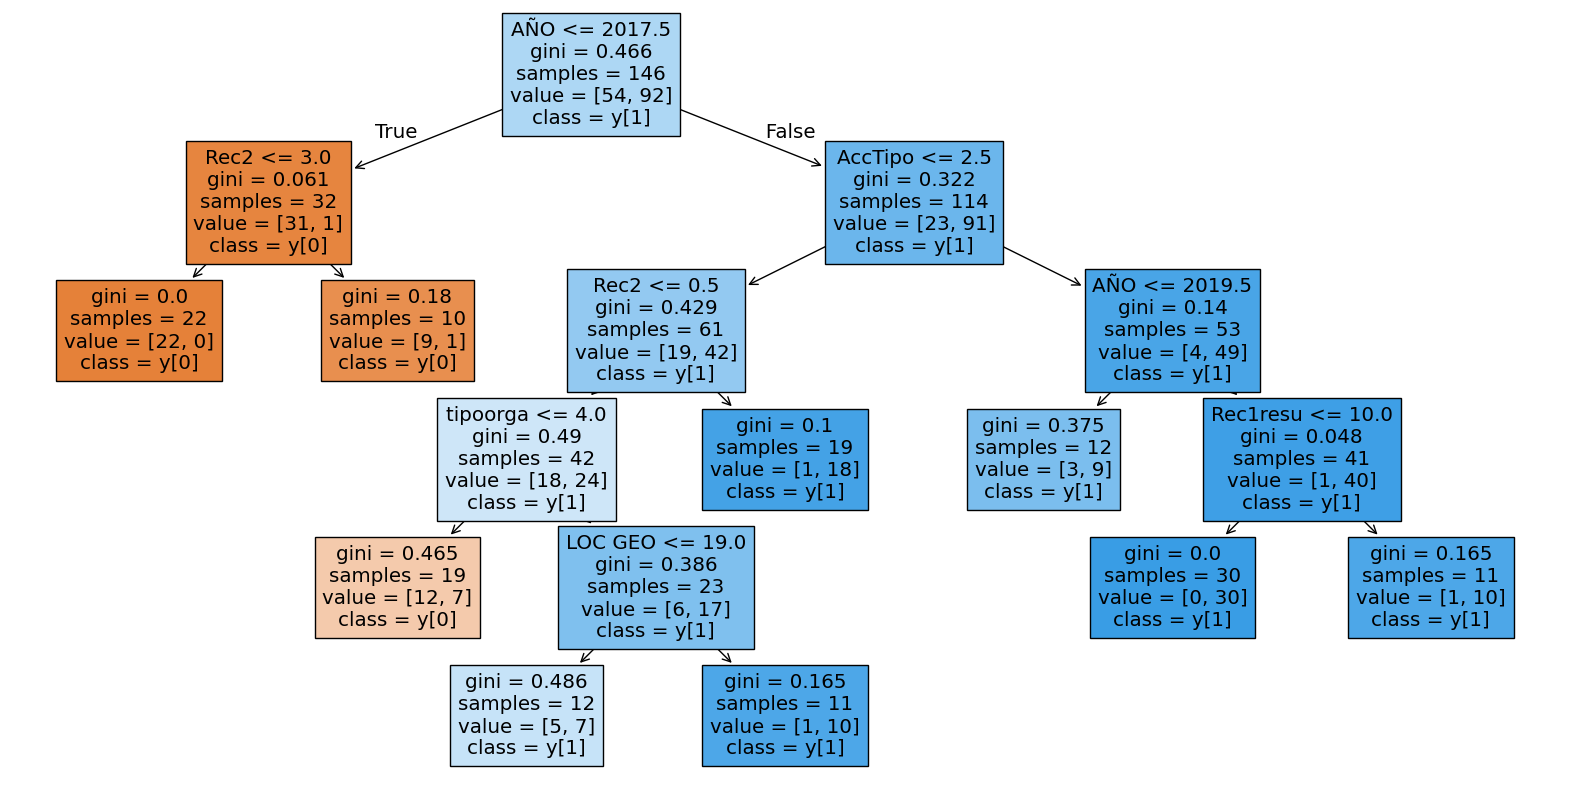

In [30]:

#df_base_conflicto_limpia

y = df_base_conflicto_limpia["Plataformas"]

columnas_X = [
    "AÑO",
    "LOC GEO",
    "tipoorga",
    "AccTipo",
    "ConfTipo",
    'S_Cod1',
    'ReclTipo',
    'Rec1',
    'Rec2',
    'ReclOrie',
    'Rec1resu',
    'AccTipoB'
    ]

X = df_base_conflicto_limpia[columnas_X]

## Verificamos que x es númerico.
X.dtypes

## una vez definidas las variables Y y X, entrenamos un arbol

from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(
    max_depth=6,        # armamos un árbol poco profundo
    min_samples_leaf=10, # evitamos sobreajuste
    random_state=42
)

arbol.fit(X, y)

## Ahora, observamos que variables usa el arbol.

importancias = pd.Series(
    arbol.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# analizamos las importancias:
importancias

'''
AÑO	0.730308
Rec2	0.092309
AccTipo	0.076035
tipoorga	0.068830
LOC GEO	0.029317
Rec1resu	0.003202
ConfTipo	0.000000
S_Cod1	0.000000
Rec1	0.000000
ReclTipo	0.000000
ReclOrie	0.000000
AccTipoB	0.000000

Las variables más relevantes para explicar la conflictividad en plataformas son el año, el reclamo secundario (Rec2),
el tipo de acción (AccTipo) y el Tipo de organización (tipoorga). En menor medida el Resumen del reclamo (Rec1Resu)y la localición geografica (LOC GEO)
El tipo de conflicto, el reclamo principal, el tipo de reclamo
y la acción secundaria no inciden en la configuración del conflicto con o sin plataformas.
'''


## Podemos separar las importancias = 0

## importancias[importancias == 0]

## por último, visualizamos el arbol

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    arbol,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()


Dado que la conflictividad en el sector de actividad (con plataforma o sin ellas) fue definido como variable dependiente, el árbol de decisión identifica qué dimensiones del conflicto contribuyen a discriminar empíricamente entre distintos sectores. Los resultados muestran que el año es la dimensión más relevante ya que establece una delimitación antes y después de las llegadas de las plataformas. En segundo lugar, continuan la demanda secundaria (rec 2), el tipo de acción y de organización. Estos datos sugieren que con la llegada de las plataformas se alteraron los patrones de conflictividad del sector. Por último, la localicación geografica tiene una incidencia menor, modulando el conflicto.
Analiticamente este arbol resulta problematico ya que pondera el reclamo secundario sobre el principal, dando cuenta que el solapamiento de variables similares puede perjudicar la coherencia analitica de nuestro proyecto. Por este motivo, haremos un nuevo arbol más pequeño seleccinando de variables teoricas que se justifiquen por su relevancia y que evite el solapamiento de datos.

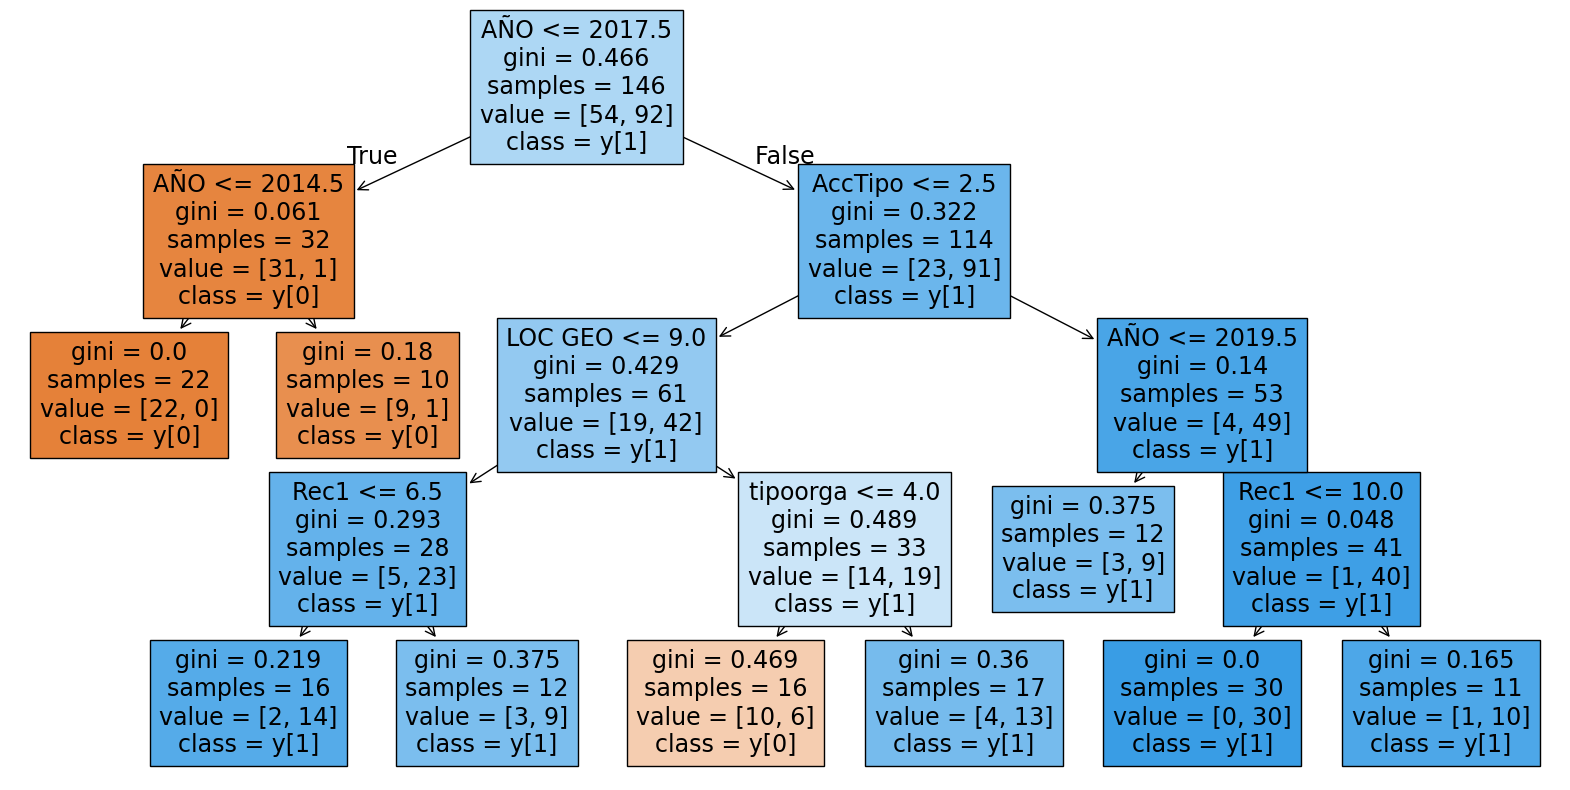

,0
AÑO,0.795442
AccTipo,0.082443
tipoorga,0.065335
LOC GEO,0.047716
Rec1,0.009064


In [16]:

'''
Antes de continuar, describo las columnas actuales y justifico la selección que incluire en el árbol corto
  "AÑO" = Año
    "LOC GEO" = Localización geografica (distrito)
    "ConfTipo" = Tipo de conflicto (Con paro o sin Paro)
    "AccTipo" = Tipo de accion desplegada (de 1 a 5)
    'AccTipoB' = acciones sin paro (desagrega AccTipo cuando no hay paro)
    "tipoorga" = Tipo de organización (9 organizaciones)
    'S_Cod1' = ??
    'ReclTipo'= Tipo de reclamo (salarial o no salarial)
    'Rec1', = reclamo principal (12 reclamos salariales y no salariales)
    'Rec2', = reclamo Secundaria
    'ReclOrie' = ??
    'Rec1resu', = (reclamo resumid0 de 1 a 10)
    ]

Hay dos variables que son descartadas porque no estan explicitadas en el diccionario del dataset y no cuento con tiempo
para llevar adelante la consulta

Decido mantener las variables principales que no son dicotomicas ni completamente desagregadas
"AÑO"
"LOC GEO"
"AccTipo" = tipo de acción
"tipoorga" = tipo de organización
'Rec1resu' = tipo de demanda

'''

y = df_base_conflicto_limpia["Plataformas"]

columnas_X = [
    "AÑO",
"LOC GEO",
"AccTipo",
"tipoorga",
'Rec1resu'
    ]

X = df_base_conflicto_limpia[columnas_X]

## una vez definidas las variables Y y X, entreno un arbol

from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(
    max_depth=6,        # armo un árbol poco profundo
    min_samples_leaf=10, # evito sobreajuste
    random_state=42
)

arbol.fit(X, y)

## Ahora, observamos que variables usa el arbol.

importancias = pd.Series(
    arbol.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# analizo las importancias:
importancias

'''
AÑO	0.795442
AccTipo	0.082443
tipoorga	0.065335
LOC GEO	0.047716
Rec1resu	0.009064

La variables más relevantes para explicar la conflictividad en plataformas continua siendo el año. El arbol muestra que el año 2017
divide la conflictividad entre trabajadores de plataformas y sin plataformas, este resultado es lógico ya que antes de esta fecha la unica empresa que operaba era
Pedidos Ya y contaba con un servicio de mensajería relativamente pequeño. A partir del año 2017, en las plataformas se observan tipos de acción y organización colectiva
diferentes a los trabajadores no plataformizados. Las demandas por su parte, continuarían siendo similares,
cambiando las acciones y organizaciones con las que se busca su satisfacción
'''



In [ ]:
## Visualizamos el nuevo arbol

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    arbol,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.show()


**Calculo de métricas para validar el modelo**


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Utilizamos test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Entrenamos el modelo con train


modelo = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=10,
    random_state=42
)

modelo.fit(X_train, y_train)

## realizamos una predicción sobre el test

y_pred = modelo.predict(X_test)

## evaluamos las métricas

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)



              precision    recall  f1-score   support

           0       0.50      0.62      0.56        16
           1       0.75      0.64      0.69        28

    accuracy                           0.64        44
   macro avg       0.62      0.63      0.62        44
weighted avg       0.66      0.64      0.64        44



array([[10,  6],
       [10, 18]])

En primer lugar, observo el array que compara la clase real con la predicha, indica que hubo 10 verdaderos negativos (TN) para no plataformas y 18 verdaderos positivos (TP) para plataformas. En estos casos, se clasifico correctamente cada tipo. A su vez, señala que hubo 6 falsos positivos (FP) no plataformas, que el modelo confundio con plataforma, y 10 falsos negativos (FN) de plataformas que el modelo confundio con no plataformas. La mayor confusión en la clasificación ocurre en plataformas. Accuaracy es una métrica que representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos. En nuestroo caso arroja un resultado de 64% que no es bajo, teniendo en cuenta que es una base de datos pequeña, pero mantiene un grado de error relativamente elevado. En recall se vuelve a realizar el test, reduciendo el acierto en no plataformas al 50% y manteniendo el acierto del 75% para plataforma. A partir de este analisis considero que debemos emplear un test que resulte más confiable para bases de datos con menor cantidad de datos.

El segundo modelo de entrenamiento de datos que vamos a emplear es el de validación cruzada (k-fold cross-validation). Llevamos una segunda validación porque el primer modelo deja muchos casos afuera (toma 44 casos de 146) y en base de datos pequeñas puede presentar una tasa de errores de clasificación elevada. El test seleccionado incluye un mayor número de casos ya que divide el dataset en partes iguales (k), las cuales utiliza de prueba y de testeo.


In [25]:
# comenzamos definiendo el modelo como hicimos en la celda anterior.

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=10,
    random_state=42
)

# luego, aplicamos la validación cruzada

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    modelo,
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

scores
# nos devuelve el siguiente array: ([0.7, 0.86206897, 0.79310345, 0.79310345, 0.82758621])

# reportamos el promedio y la dispersión: (np.float64(0.7951724137931034), np.float64(0.05402249938638935))

scores.mean(), scores.std()

#por último, analizamos las metricas del test: (np.float64(0.8344098986204249), np.float64(0.04967444023973387))


scores_f1 = cross_val_score(
    modelo,
    X,
    y,
    cv=cv,
    scoring="f1"
)

scores_f1.mean(), scores_f1.std()



(np.float64(0.8344098986204249), np.float64(0.04967444023973387))

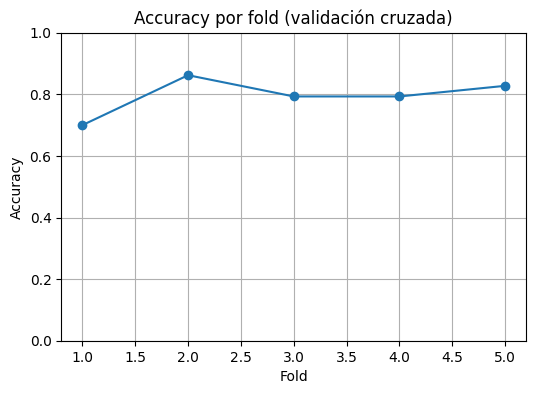

In [28]:
#graficamos los resultados del test k fold cross
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1,6), scores, marker="o")
plt.ylim(0,1)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy por fold (validación cruzada)")
plt.grid(True)
plt.show()

La validación cruzada muestra las 5 particiones (folds) en las que se dividio el dataset. En cada iteración se entrenaron 4 folds y se evaluo uno distinto. En el peor fold el modelo acertó el 70% de los casos y en el mejor el 86%, ubicandose la mayoría entre un 79 y un 83%. El modelo es estable y no cuenta con outliers extremos.

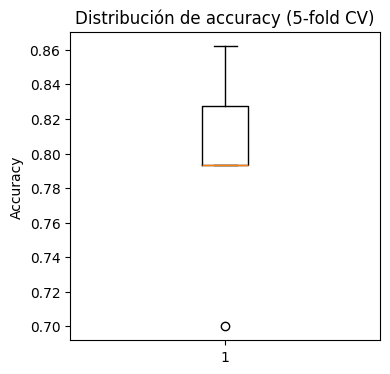

In [29]:
# plot de distribución de accuracy

plt.figure(figsize=(4,4))
plt.boxplot(scores)
plt.ylabel("Accuracy")
plt.title("Distribución de accuracy (5-fold CV)")
plt.show()

El plot resume la mediana, dispersión y rango del modelo. La accuracy tiene un promedio del 80% y la desviación estandar es del 0,5%. El modelo acierta en un promedio del 80% de los casos con una variación moderada entre particiones.

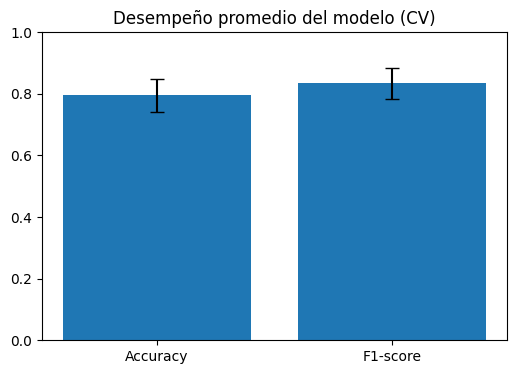

In [31]:
## por último, gráficamos el desempeño promedio del modelo

plt.figure(figsize=(6,4))
plt.bar(
    ["Accuracy", "F1-score"],
    [scores.mean(), scores_f1.mean()],
    yerr=[scores.std(), scores_f1.std()],
    capsize=5
)
plt.ylim(0,1)
plt.title("Desempeño promedio del modelo (CV)")
plt.show()


El F1-score combina precision y recall para la clase positiva (plataformas).
Al ser mayor el F1-score que Accuracy el modelo es particularmente eficar para identificar conflictos en plataformas, que es el objetivo analítico central

Conclusiones.
**texto en negrita**A lo largo de este proyecto realice, en primer lugar, un análisis exploratorio de datos (EDA), una limpieza de la base de datos (DC) y una reducción de dimensiones (feature selection).
En segundo lugar, seleccione un método de aprendizaje supervisado basado en un árbol de decisiones clasificatorio que me permitió predecir sí un conflicto laboral en el sector de mensajería y reparto urbano involucra trabajadores de plataformas.
En tercer lugar, validae el modelo con el método k-fold cross-validation indicado para bases de datos pequeñas ya que involucra la totalidad de datos para la evaluación y el testeo. La validación cruzada estratificada de 5 particiones permitió obtener estimaciones más estables del desempeño del modelo. En relación al método train-split, se redujo la dependencia de una única partición de entrenamiento y prueba. El modelo alcanzó una accuracy promedio del 80% con una desviación estándar de 0.5, lo que sugiere un desempeño moderado pero consistente para discriminar conflictos asociados al trabajo en plataformas.”"
Sin embargo, consideramos que el diseño del árbol aún cuenta con puntos críticos para el análisis debido a que los datos de tipo INT son comprendidos como categorías consecutivas de variables numéricas y no como códigos de un diccionario. Esto genera puntos de cortes expresados como valores intermedios (por ejemplo, 2.5) que agrupan datos mayores o menores. Este agrupamiento es útil para variables temporales o acciones de protesta ordenadas por su mayor o menor intensidad, pero resultan problemáticos para las columnas que agrupan ubicaciones geográficas, tipos de demanda y de organización. Una solución posible radica en transformar los datos agrupados en columnas independientes a partir del método get_dummies de pandas (pd.get_dummies(df["X"], prefix="X")). En futuros trabajos nos proponemos avanzar en dicho análisis.
Cómo señalamos previamente, el cluster que agrupa patrones de conflictividad y sus transformaciones tras la llegada de las plataformas excede los objetivos de la consigna, pero se incorpora en un colab separado.  
